# Spotify Music Data Analysis in Quarantine: Clustering

<p>Students:</p>
<ul>
    <li> Ronie Arauco </li>
    <li> Handry Guillen </li>
<ul>

The data that we are using have been extracted first from SpotifyCharts (Official Spotify page for Top 50 and Top viral 50), this data contains all the Top 50 id's tracks for each country available for Spotify.

Once we have the id's, we make use of Spotify API for extract all the variables available for each track. These are the follows:

|Fields|Type|Description|
|---|---|---|
|country|string|Country of the Top 50 Playlist.|
|date_extraction|timestamp|Date of the Top 50 Playlist.|
|track_id|string|The Spotify ID for the track.|
|streams|int|Number of streams of the track.|
|album|string|The album on which the track appears.|
|artist|string|The artists who performed the track.|
|duration_ms|int|The duration of the track in milliseconds.|
|track_name|string|The name of the track.|
|track_danceability|float|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.|
|track_energy|float|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.|
|track_key|int|The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.|
|track_loudness|float|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|track_mode|int|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|track_speechiness|float|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
|track_acousticness|float|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|track_instrumentalness|float|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
|track_liveness|float|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.|
|track_valence|float|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|
|track_tempo|float|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.|
|explicit|bool|One (1) when the track has explicit lyrics.|
|not_explicit|bool|Zero (0) when the track doesn't have explicit lyrics.|

<img src="https://dl-ta-dataset.s3.amazonaws.com/expo.png" alt="drawing" width="1000"/>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. K-Means

### 1.1. Reading the data

In [1]:
# Just for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
df_southamerica = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_southamerica.csv')

NameError: ignored

In [ ]:
df_southamerica = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_southamerica.csv')
df_northamerica = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_northamerica.csv')
df_europe = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_europe.csv')
df_asia = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_asia.csv')
df_africa = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_africa.csv')
df_oceania = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_oceania.csv')
df_peru = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_peru.csv')

In [ ]:
df_southamerica.shape

(2166, 21)

In [ ]:
df_southamerica.sample(5)

,country,date_extraction,track_id,streams,album,artist,duration_ms,track_name,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,not_explicit,explicit
1800,Chile,2020-06-11,53v2u51nq3CxiKUNphRzP1,0.029258,YHLQMDLG,"Bad Bunny,Nengo Flow",0.084721,Que Malo,0.802,0.787,0.636364,0.582768,0.0,0.0599,0.0832,0.000000,0.1530,0.446,0.233892,0,1
1575,Paraguay,2020-06-10,4otCJXUgnt6SUMhDMNqjhX,0.002233,En Tu Cuerpo,Lyanno,0.144222,En Tu Cuerpo,0.746,0.720,0.000000,0.689762,0.0,0.1090,0.2420,0.000196,0.1270,0.651,0.655579,0,1
416,Peru,2020-01-24,25qU7UPwnrWJ4cfnwbrboq,0.013762,Intuición,Gian Marco,0.131165,Sácala a Bailar,0.809,0.918,0.181818,0.617709,0.0,0.0444,0.2440,0.011200,0.0542,0.827,0.308600,1,0
2084,Uruguay,2020-06-11,3pMo77B4r1NwwIK78lO4xf,0.001001,27,Ciro y los Persas,0.180108,Me Gusta,0.639,0.830,0.181818,0.633227,1.0,0.0267,0.0369,0.000024,0.0756,0.698,0.492254,1,0
1737,Brazil,2020-06-11,1JP3iGUerYKKYQwXGQGYks,0.132260,CUTE BUT (still) PSYCHO,Manu Gavassi,0.091399,áudio de desculpas,0.810,0.660,0.909091,0.462482,1.0,0.3440,0.4470,0.000000,0.1050,0.556,0.512786,1,0


### 1.2. Elbow Method

In [ ]:
df_southamerica_features = df_southamerica.loc[:, \
     ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_southamerica_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.655,0.1110,0.712,0.838
1,0.790,0.2300,0.868,0.519
2,0.916,0.0679,0.809,0.736
3,0.762,0.6160,0.799,0.732
4,0.875,0.2350,0.772,0.641


In [ ]:
df_northamerica_features = df_northamerica.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_northamerica_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.887,0.0192,0.881,0.599
1,0.713,0.0400,0.354,0.699
2,0.638,0.0200,0.735,0.378
3,0.848,0.0330,0.485,0.447
4,0.798,0.2260,0.857,0.649


In [ ]:
df_europe_features = df_europe.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_europe_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.974,0.1030,0.965,0.728
1,0.586,0.1910,0.119,0.851
2,0.626,0.0589,0.350,0.835
3,0.812,0.2300,0.888,0.659
4,0.656,0.6640,0.782,0.450


In [ ]:
df_asia_features = df_asia.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_asia_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.322,0.370,0.229,0.589
1,0.301,0.874,0.251,0.544
2,0.350,0.685,0.528,0.689
3,0.570,0.695,0.211,0.324
4,0.330,0.892,0.285,0.559


In [ ]:
df_africa_features = df_africa.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_africa_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.438,0.0662,0.277,0.898
1,0.875,0.0121,0.771,0.869
2,0.707,0.0129,0.137,0.763
3,0.603,0.0122,0.444,0.773
4,0.635,0.4470,0.428,0.784


In [ ]:
df_oceania_features = df_oceania.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_oceania_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.609,0.00801,0.928,0.856
1,0.881,0.29600,0.234,0.674
2,0.530,0.05780,0.507,0.907
3,0.386,0.01770,0.353,0.828
4,0.600,0.07100,0.568,0.859


In [ ]:
df_peru_features = df_peru.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_peru_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.805,0.4480,0.689,0.661
1,0.709,0.0948,0.706,0.763
2,0.765,0.3040,0.899,0.769
3,0.872,0.4580,0.905,0.549
4,0.934,0.0817,0.889,0.661


In [ ]:
wcss_southamerica = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=400)
    kmeans.fit(df_southamerica_features)
    wcss_southamerica.append(kmeans.inertia_)

In [ ]:
wcss_northamerica = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=400)
    kmeans.fit(df_northamerica_features)
    wcss_northamerica.append(kmeans.inertia_)

In [ ]:
wcss_europe = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df_europe_features)
    wcss_europe.append(kmeans.inertia_)

In [ ]:
wcss_asia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=400)
    kmeans.fit(df_asia_features)
    wcss_asia.append(kmeans.inertia_)

In [ ]:
wcss_africa = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=400)
    kmeans.fit(df_africa_features)
    wcss_africa.append(kmeans.inertia_)

In [ ]:
wcss_oceania = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=400)
    kmeans.fit(df_oceania_features)
    wcss_oceania.append(kmeans.inertia_)

In [ ]:
wcss_peru = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=400)
    kmeans.fit(df_peru_features)
    wcss_peru.append(kmeans.inertia_)

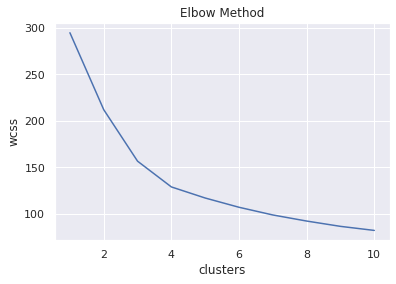

In [ ]:
plt.plot(range(1, 11), wcss_southamerica)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()
# 4 clusters

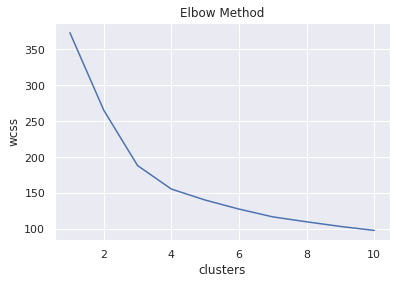

In [ ]:
plt.plot(range(1, 11), wcss_northamerica)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()
# 4 clusters

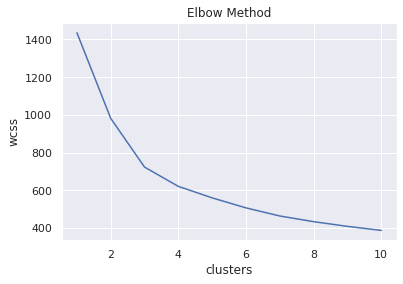

In [ ]:
plt.plot(range(1, 11), wcss_europe)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()
# 4 clusters

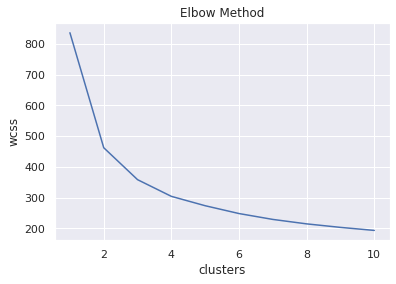

In [ ]:
plt.plot(range(1, 11), wcss_asia)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()
# 4 clusters

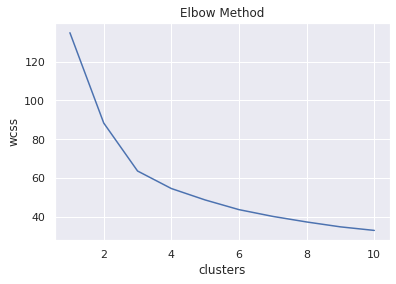

In [ ]:
plt.plot(range(1, 11), wcss_africa)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()
# 4 clusters

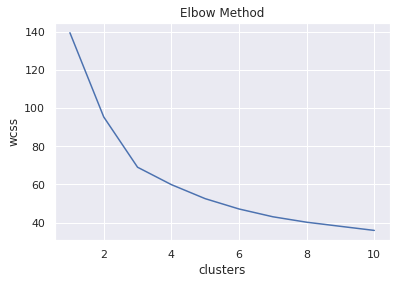

In [ ]:
plt.plot(range(1, 11), wcss_oceania)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()
# 4 clusters

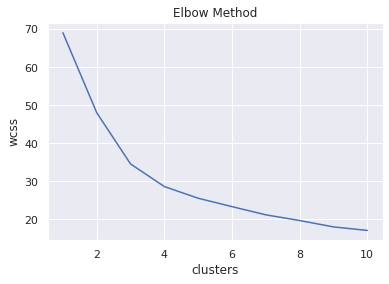

In [ ]:
plt.plot(range(1, 11), wcss_peru)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()
# 4 clusters

### 1.3. K-Means Algorithm

In [ ]:
clusters_southamerica = KMeans(n_clusters=4, max_iter=400)
clusters_southamerica.fit(df_southamerica_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters_northamerica = KMeans(n_clusters=4, max_iter=400)
clusters_northamerica.fit(df_northamerica_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters_europe = KMeans(n_clusters=4, max_iter=400)
clusters_europe.fit(df_europe_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters_asia = KMeans(n_clusters=4, max_iter=400)
clusters_asia.fit(df_asia_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters_africa = KMeans(n_clusters=4, max_iter=400)
clusters_africa.fit(df_africa_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters_oceania = KMeans(n_clusters=4, max_iter=400)
clusters_oceania.fit(df_oceania_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters_peru = KMeans(n_clusters=4, max_iter=400)
clusters_peru.fit(df_peru_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_southamerica_features['clusters'] = clusters_southamerica.labels_
df_southamerica_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.655,0.1110,0.712,0.838,1
1,0.790,0.2300,0.868,0.519,1
2,0.916,0.0679,0.809,0.736,1
3,0.762,0.6160,0.799,0.732,0
4,0.875,0.2350,0.772,0.641,1


In [ ]:
df_northamerica_features['clusters'] = clusters_northamerica.labels_
df_northamerica_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.887,0.0192,0.881,0.599,2
1,0.713,0.0400,0.354,0.699,1
2,0.638,0.0200,0.735,0.378,2
3,0.848,0.0330,0.485,0.447,1
4,0.798,0.2260,0.857,0.649,2


In [ ]:
df_europe_features['clusters'] = clusters_europe.labels_
df_europe_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.974,0.1030,0.965,0.728,0
1,0.586,0.1910,0.119,0.851,2
2,0.626,0.0589,0.350,0.835,2
3,0.812,0.2300,0.888,0.659,0
4,0.656,0.6640,0.782,0.450,1


In [ ]:
df_asia_features['clusters'] = clusters_asia.labels_
df_asia_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.322,0.370,0.229,0.589,1
1,0.301,0.874,0.251,0.544,1
2,0.350,0.685,0.528,0.689,3
3,0.570,0.695,0.211,0.324,1
4,0.330,0.892,0.285,0.559,1


In [ ]:
df_africa_features['clusters'] = clusters_africa.labels_
df_africa_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.438,0.0662,0.277,0.898,0
1,0.875,0.0121,0.771,0.869,1
2,0.707,0.0129,0.137,0.763,0
3,0.603,0.0122,0.444,0.773,0
4,0.635,0.4470,0.428,0.784,2


In [ ]:
df_oceania_features['clusters'] = clusters_oceania.labels_
df_oceania_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.609,0.00801,0.928,0.856,0
1,0.881,0.29600,0.234,0.674,3
2,0.530,0.05780,0.507,0.907,3
3,0.386,0.01770,0.353,0.828,3
4,0.600,0.07100,0.568,0.859,0


In [ ]:
df_peru_features['clusters'] = clusters_peru.labels_
df_peru_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.805,0.4480,0.689,0.661,0
1,0.709,0.0948,0.706,0.763,2
2,0.765,0.3040,0.899,0.769,2
3,0.872,0.4580,0.905,0.549,0
4,0.934,0.0817,0.889,0.661,2


In [ ]:
pca = PCA(n_components=2)
pca_southamerica = pca.fit_transform(df_southamerica_features)

In [ ]:
tsne = TSNE(n_components=2, random_state = 0)
tsne_southamerica = tsne.fit_transform(df_southamerica_features)

In [ ]:
pca = PCA(n_components=2)
pca_northamerica = pca.fit_transform(df_northamerica_features)

In [ ]:
tsne = TSNE(n_components=2, random_state = 0)
tsne_northamerica = tsne.fit_transform(df_northamerica_features)

In [ ]:
pca = PCA(n_components=2)
pca_europe = pca.fit_transform(df_europe_features)

In [ ]:
tsne = TSNE(n_components=2, random_state = 0)
tsne_europe = tsne.fit_transform(df_europe_features)

In [ ]:
pca = PCA(n_components=2)
pca_asia = pca.fit_transform(df_asia_features)

In [ ]:
tsne = TSNE(n_components=2, random_state = 0)
tsne_asia = tsne.fit_transform(df_asia_features)

In [ ]:
pca = PCA(n_components=2)
pca_africa = pca.fit_transform(df_africa_features)

In [ ]:
tsne = TSNE(n_components=2, random_state = 0)
tsne_africa = tsne.fit_transform(df_africa_features)

In [ ]:
pca = PCA(n_components=2)
pca_oceania = pca.fit_transform(df_oceania_features)

In [ ]:
tsne = TSNE(n_components=2, random_state = 0)
tsne_oceania = tsne.fit_transform(df_oceania_features)

In [ ]:
pca = PCA(n_components=2)
pca_peru = pca.fit_transform(df_peru_features)

In [ ]:
tsne = TSNE(n_components=2, random_state = 0)
tsne_peru = tsne.fit_transform(df_peru_features)

In [ ]:
df_pca_southamerica = pd.DataFrame(data=pca_southamerica, columns=['pca1', 'pca2'])
df_pca_southamerica['clusters'] = df_southamerica_features['clusters']
df_pca_southamerica.head()

,pca1,pca2,clusters
0,-0.225760,-0.173727,1
1,-0.249882,-0.072096,1
2,-0.254564,-0.287282,1
3,-1.229319,0.305490,0
4,-0.243544,-0.103876,1


In [ ]:
df_tsne_southamerica = pd.DataFrame(data=tsne_southamerica, columns=['tsne1', 'tsne2'])
df_tsne_southamerica['clusters'] = df_southamerica_features['clusters']
df_tsne_southamerica.head()

,tsne1,tsne2,clusters
0,-20.147415,-48.173855,1
1,7.098587,-31.881590,1
2,18.074839,-33.340824,1
3,-7.421360,41.872112,0
4,9.047875,-26.818998,1


In [ ]:
df_pca_northamerica = pd.DataFrame(data=pca_northamerica, columns=['pca1', 'pca2'])
df_pca_northamerica['clusters'] = df_northamerica_features['clusters']
df_pca_northamerica.head()

,pca1,pca2,clusters
0,0.613192,-0.450321,2
1,-0.365761,-0.036231,1
2,0.628511,-0.210521,2
3,-0.367563,-0.124711,1
4,0.615469,-0.273127,2


In [ ]:
df_tsne_northamerica = pd.DataFrame(data=tsne_northamerica, columns=['tsne1', 'tsne2'])
df_tsne_northamerica['clusters'] = df_northamerica_features['clusters']
df_tsne_northamerica.head()

,tsne1,tsne2,clusters
0,12.832801,58.672127,2
1,-13.206080,-48.338322,1
2,17.482922,49.605686,2
3,-10.209112,-63.100124,1
4,-3.372858,58.278641,2


In [ ]:
df_pca_europe = pd.DataFrame(data=pca_europe, columns=['pca1', 'pca2'])
df_pca_europe['clusters'] = df_europe_features['clusters']
df_pca_europe.head()

,pca1,pca2,clusters
0,-1.310186,-0.029553,0
1,0.812497,-0.203927,2
2,0.761577,-0.267141,2
3,-1.270629,0.112229,0
4,-0.212604,0.459977,1


In [ ]:
df_tsne_europe = pd.DataFrame(data=tsne_europe, columns=['tsne1', 'tsne2'])
df_tsne_europe['clusters'] = df_europe_features['clusters']
df_tsne_europe.head()

,tsne1,tsne2,clusters
0,24.076277,-68.235748,0
1,-70.414093,28.611959,2
2,-33.668587,15.924164,2
3,40.303791,-64.183929,0
4,14.274673,6.992192,1


In [ ]:
df_pca_asia = pd.DataFrame(data=pca_asia, columns=['pca1', 'pca2'])
df_pca_asia['clusters'] = df_asia_features['clusters']
df_pca_asia.head()

,pca1,pca2,clusters
0,-0.356855,0.257472,1
1,-0.323891,0.673411,1
2,1.634830,0.203483,3
3,-0.343524,0.453808,1
4,-0.326059,0.661188,1


In [ ]:
df_tsne_asia = pd.DataFrame(data=tsne_asia, columns=['tsne1', 'tsne2'])
df_tsne_asia['clusters'] = df_asia_features['clusters']
df_tsne_asia.head()

,tsne1,tsne2,clusters
0,-45.583172,-7.812603,1
1,-1.287793,4.771541,1
2,-29.844824,-57.515629,3
3,-27.347923,3.394946,1
4,-0.607997,4.345078,1


In [ ]:
df_pca_africa = pd.DataFrame(data=pca_africa, columns=['pca1', 'pca2'])
df_pca_africa['clusters'] = df_africa_features['clusters']
df_pca_africa.head()

,pca1,pca2,clusters
0,-1.058610,0.175116,0
1,-0.110161,-0.467643,1
2,-1.087913,0.226474,0
3,-1.072641,-0.004036,0
4,0.963878,-0.011294,2


In [ ]:
df_tsne_africa = pd.DataFrame(data=tsne_africa, columns=['tsne1', 'tsne2'])
df_tsne_africa['clusters'] = df_africa_features['clusters']
df_tsne_africa.head()

,tsne1,tsne2,clusters
0,-15.555107,-32.648411,0
1,-31.789167,6.366309,1
2,-11.034500,-41.256332,0
3,-8.703253,-25.689074,0
4,23.239962,20.062891,2


In [ ]:
df_pca_oceania = pd.DataFrame(data=pca_oceania, columns=['pca1', 'pca2'])
df_pca_oceania['clusters'] = df_oceania_features['clusters']
df_pca_oceania.head()

,pca1,pca2,clusters
0,-1.510999,-0.202320,0
1,1.547625,-0.077925,3
2,1.516788,-0.189260,3
3,1.544431,-0.129143,3
4,-1.462803,-0.090929,0


In [ ]:
df_tsne_oceania = pd.DataFrame(data=tsne_oceania, columns=['tsne1', 'tsne2'])
df_tsne_oceania['clusters'] = df_oceania_features['clusters']
df_tsne_oceania.head()

,tsne1,tsne2,clusters
0,-29.689863,-8.140039,0
1,15.490254,25.023901,3
2,26.902954,19.993996,3
3,23.754824,13.041291,3
4,-17.819330,-2.520493,0


In [ ]:
df_pca_peru = pd.DataFrame(data=pca_peru, columns=['pca1', 'pca2'])
df_pca_peru['clusters'] = df_peru_features['clusters']
df_pca_peru.head()

,pca1,pca2,clusters
0,1.781965,-0.007687,0
1,-0.239113,-0.142133,2
2,-0.196499,-0.201646,2
3,1.798579,-0.165945,0
4,-0.229466,-0.358025,2


In [ ]:
df_tsne_peru = pd.DataFrame(data=tsne_peru, columns=['tsne1', 'tsne2'])
df_tsne_peru['clusters'] = df_peru_features['clusters']
df_tsne_peru.head()

,tsne1,tsne2,clusters
0,42.405388,3.549723,0
1,-3.204734,-18.626501,2
2,-11.268394,-23.009171,2
3,41.765350,-2.465229,0
4,4.216870,-21.294588,2


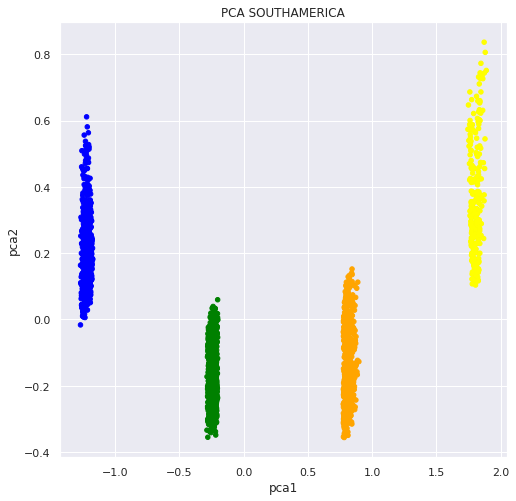

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA SOUTHAMERICA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_pca_southamerica['pca1'], y=df_pca_southamerica['pca2'], c=colors[df_pca_southamerica['clusters']], s=20)
plt.show()

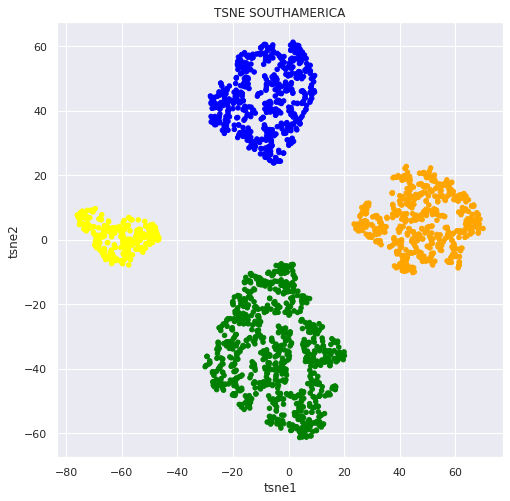

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_title('TSNE SOUTHAMERICA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_tsne_southamerica['tsne1'], y=df_tsne_southamerica['tsne2'], c=colors[df_tsne_southamerica['clusters']], s=20)
plt.show()

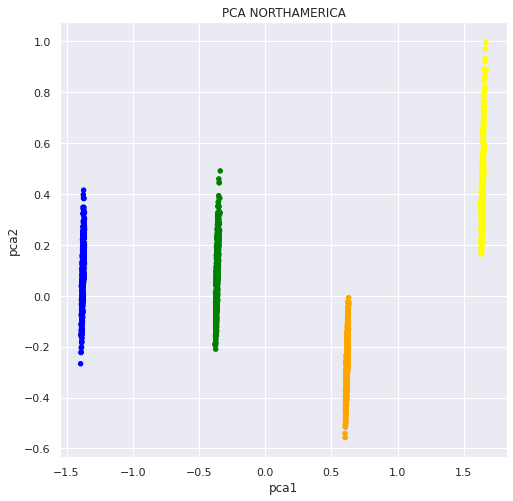

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA NORTHAMERICA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_pca_northamerica['pca1'], y=df_pca_northamerica['pca2'], c=colors[df_pca_northamerica['clusters']], s=20)
plt.show()

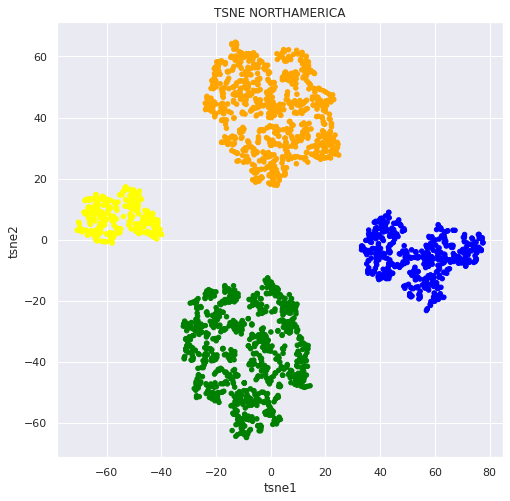

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_title('TSNE NORTHAMERICA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_tsne_northamerica['tsne1'], y=df_tsne_northamerica['tsne2'], c=colors[df_tsne_northamerica['clusters']], s=20)
plt.show()

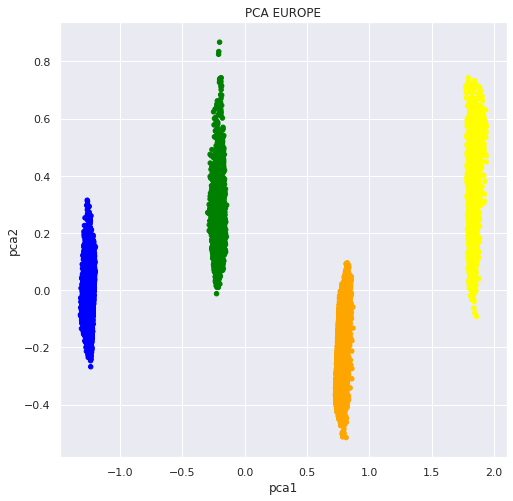

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA EUROPE')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_pca_europe['pca1'], y=df_pca_europe['pca2'], c=colors[df_pca_europe['clusters']], s=20)
plt.show()

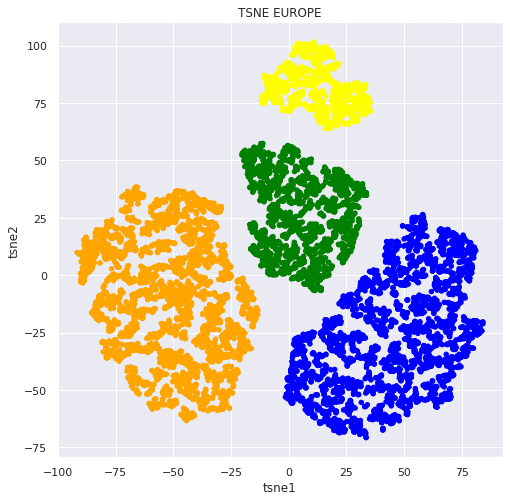

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_title('TSNE EUROPE')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_tsne_europe['tsne1'], y=df_tsne_europe['tsne2'], c=colors[df_tsne_europe['clusters']], s=20)
plt.show()

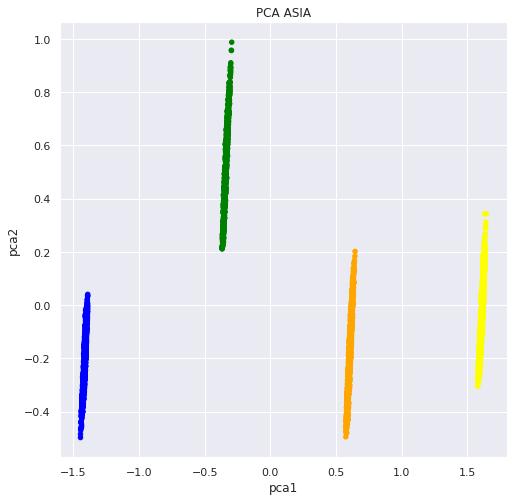

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA ASIA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_pca_asia['pca1'], y=df_pca_asia['pca2'], c=colors[df_pca_asia['clusters']], s=20)
plt.show()

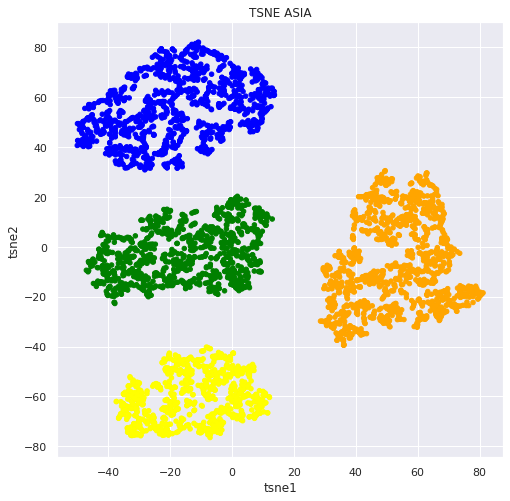

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_title('TSNE ASIA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_tsne_asia['tsne1'], y=df_tsne_asia['tsne2'], c=colors[df_tsne_asia['clusters']], s=20)
plt.show()

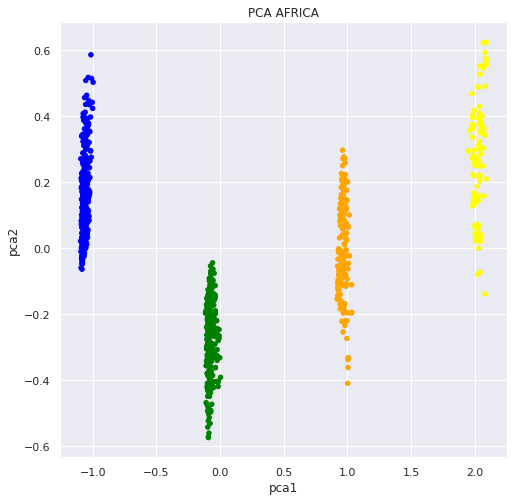

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA AFRICA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_pca_africa['pca1'], y=df_pca_africa['pca2'], c=colors[df_pca_africa['clusters']], s=20)
plt.show()

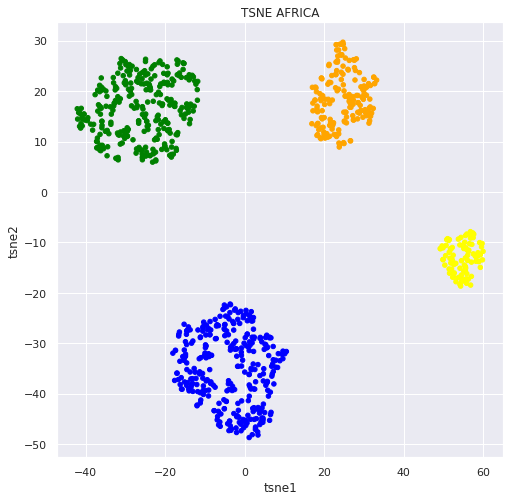

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_title('TSNE AFRICA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_tsne_africa['tsne1'], y=df_tsne_africa['tsne2'], c=colors[df_tsne_africa['clusters']], s=20)
plt.show()

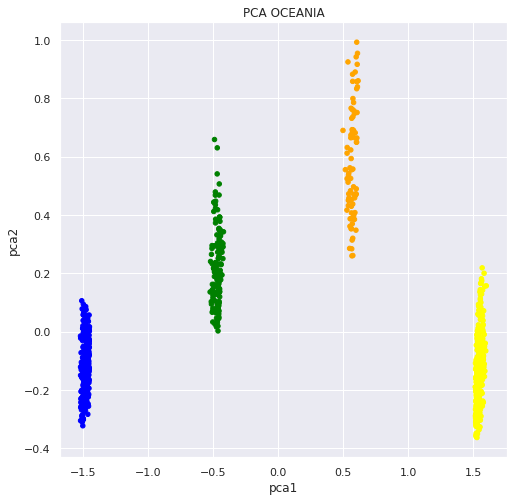

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA OCEANIA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_pca_oceania['pca1'], y=df_pca_oceania['pca2'], c=colors[df_pca_oceania['clusters']], s=20)
plt.show()

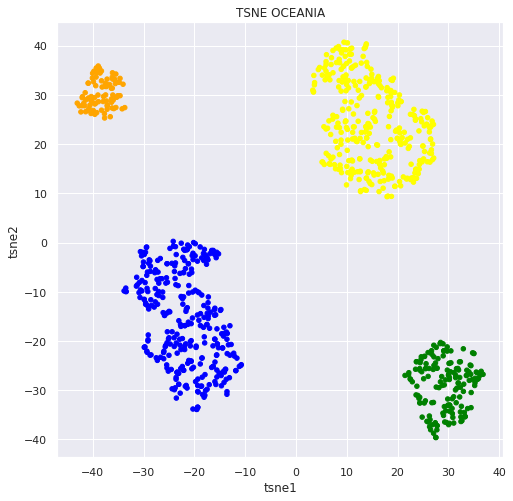

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_title('TSNE OCEANIA')
colors = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(x=df_tsne_oceania['tsne1'], y=df_tsne_oceania['tsne2'], c=colors[df_tsne_oceania['clusters']], s=20)
plt.show()

### 1.4. Analyzing Results

In [ ]:
df_left_southamerica = pd.DataFrame(data=df_southamerica.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_southamerica_results = pd.concat([df_left_southamerica, df_southamerica_features], axis=1)

In [ ]:
df_left_northamerica = pd.DataFrame(data=df_northamerica.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_northamerica_results = pd.concat([df_left_northamerica, df_northamerica_features], axis=1)

In [ ]:
df_left_europe = pd.DataFrame(data=df_europe.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_europe_results = pd.concat([df_left_europe, df_europe_features], axis=1)

In [ ]:
df_left_asia = pd.DataFrame(data=df_asia.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_asia_results = pd.concat([df_left_asia, df_asia_features], axis=1)

In [ ]:
df_left_africa = pd.DataFrame(data=df_africa.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_africa_results = pd.concat([df_left_africa, df_africa_features], axis=1)

In [ ]:
df_left_oceania = pd.DataFrame(data=df_oceania.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_oceania_results = pd.concat([df_left_oceania, df_oceania_features], axis=1)

In [ ]:
df_left_peru = pd.DataFrame(data=df_peru.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_peru_results = pd.concat([df_left_peru, df_peru_features], axis=1)

In [ ]:
df_southamerica_results['clusters'].value_counts()

1    846
0    545
2    534
3    241
Name: clusters, dtype: int64

In [ ]:
df_northamerica_results['clusters'].value_counts()

1    844
2    823
0    486
3    284
Name: clusters, dtype: int64

In [ ]:
df_europe_results['clusters'].value_counts()

2    3509
0    3316
1    1898
3     977
Name: clusters, dtype: int64

In [ ]:
df_asia_results['clusters'].value_counts()

2    1260
0    1205
1    1038
3     803
Name: clusters, dtype: int64

In [ ]:
df_africa_results['clusters'].value_counts()

0    319
1    299
2    177
3     94
Name: clusters, dtype: int64

In [ ]:
df_oceania_results['clusters'].value_counts()

3    328
0    324
1    161
2     85
Name: clusters, dtype: int64

In [ ]:
df_peru_results['clusters'].value_counts()

2    247
3    148
0    113
1     49
Name: clusters, dtype: int64

In [ ]:
df_southamerica_results.loc[df_southamerica_results.loc[:, 'clusters'] == 0].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
3,Argentina,2020-01-01,7ovvopa6MpiwzPOzY2TkVi,Sean Eternos Los Palmeras,"Los Palmeras,Andrés Calamaro",Asesina,0.762,0.616,0.799,0.732,0
8,Argentina,2020-01-01,5ISajXj2M1yvkrC0KsgbR5,25 Años (En Vivo),Los del Fuego,Jurabas Tu,0.702,0.498,0.853,0.752,0
10,Argentina,2020-01-01,5HgNYJmYucAPD2UpuQfL3t,Sinfónico 45 Años - En Vivo,"Los Palmeras,Filarmónica de Santa Fe",Perra,0.615,0.484,0.736,0.671,0
11,Argentina,2020-01-01,5RrWhIEmeYBZjBP2Y32POl,Sean Eternos Los Palmeras,"Los Palmeras,Marcela Morelo",Amor,0.573,0.320,0.931,0.700,0
12,Argentina,2020-01-01,2cTKuxpHcPzDFRbbhE2WxP,Un Sentimiento,La K'onga,La Cabaña,0.867,0.512,0.669,0.668,0
...,...,...,...,...,...,...,...,...,...,...,...
2140,Uruguay,2020-06-11,3AR1c3Dssq51WlGGkuYJNj,La Flaca,Jarabe De Palo,El lado oscuro,0.723,0.528,0.748,0.818,0
2143,Uruguay,2020-06-11,727DZ6qsujnLdNNLooqqZT,Por Primera Vez,"Camilo,Shakira,Pedro Capó",Tutu - Remix,0.802,0.411,0.866,0.728,0
2145,Uruguay,2020-06-11,49rFA0vfmY9Eel2cInKmTk,Atrevido,Trueno,Atrevido,0.641,0.348,0.875,0.846,0
2155,Uruguay,2020-06-11,2qG5sZ7Si6sdK74qLxedYM,Con Altura,"ROSALÍA,J Balvin,El Guincho",Con Altura,0.689,0.390,0.746,0.882,0


<img src="https://radiosaochico.com.br/uploads/c92628c0248ae988960f6188da56e887.jpg" alt="drawing" width="450"/>

Here we can found trap, sertanejo, salsa, cumbia and other latinoamerican fussions with good vibes, high energy value and rythm.

In [ ]:
df_southamerica_results.loc[df_southamerica_results.loc[:, 'clusters'] == 1].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
2081,Uruguay,2020-06-11,6RyaV7owmVU6fzEPE17sF1,Que Tire Pa Lante,Daddy Yankee,Que Tire Pa Lante,0.901,0.0478,0.708,0.658,1
144,Colombia,2020-01-01,3HJFwx1MiBIuyivW8DspDX,El Mejor Disco de Diciembre,Adolfo Echeverría Y Su Conjunto,Amaneciendo,0.723,0.1310,0.716,0.647,1
1622,Brazil,2020-06-11,2WlZuBDgLfT7Kc0admhFdg,BRABA,Luísa Sonza,BRABA,0.689,0.1810,0.663,0.811,1
1329,Colombia,2020-05-22,4d2xH6EHSOycRY4BjOTKel,1 of 1,Sech,Trofeo,0.758,0.2670,0.879,0.744,1
434,Peru,2020-01-26,0KoiMHhqKLoL4xM54rcWYY,Carte Blanche,"DJ Snake,Selena Gomez,Ozuna,Cardi B","Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",0.801,0.1570,0.617,0.842,1
1751,Brazil,2020-06-11,0hVXuCcriWRGvwMV1r5Yn9,No.6 Collaborations Project,"Ed Sheeran,Justin Bieber",I Don't Care (with Justin Bieber),0.675,0.0912,0.842,0.798,1
658,Uruguay,2020-02-26,6RyuoOJXNzlVWpfC5xQyeI,Alocao (With Bad Gyal),"Omar Montes,Bad Gyal",Alocao (With Bad Gyal),0.752,0.2140,0.699,0.673,1
484,Colombia,2020-02-03,2wDJTWKQTuMZXNRvl7dcB5,Amor Bailando,Llane,Amor Bailando,0.609,0.0360,0.668,0.908,1
1858,Peru,2020-06-11,6NFqonbFp2QhnJIh7cE2s3,En Peligro de Extinción,"Bembe Orquesta,Farik Grippa",En Peligro de Extinción,0.877,0.2370,0.752,0.665,1
419,Brazil,2020-01-25,2vdY4HzOTDkgHPlzgOVsdE,Plaquinha de Aviso (Ao Vivo),"Gustavo Mioto,Wesley Safadão",Plaquinha de Aviso - Ao Vivo,0.915,0.2740,0.634,0.589,1


<img src="https://pbs.twimg.com/media/DIJpk6eXYAAptHA.jpg" alt="drawing" width="450"/>

This playlist is characterized by music with a lot of groove so it is highly playable in a party. It contains genres such as reggeaton, pop and alternative music, with loud beats and transmits a good energy. Our hypothesis could be that southamericans mantain their happiness and their aims of party or meetings during the quarantine. Days of happiness it is good for mental health so until here people of southamerica have had a good balance of music despite of the complex context. 

In [ ]:
df_southamerica_results.loc[df_southamerica_results.loc[:, 'clusters'] == 2].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
644,Brazil,2020-02-26,4lzdvZhokhDcKdUG4h6OdT,Vacilei,"Mad Dogz,Danny,Matheus Alves",Vacilei,0.577,0.10300,0.4940,0.406,2
1210,Chile,2020-05-10,665AK0ovB11McZRwfa852G,Astronomia,"Vicetone,Tony Igy",Astronomia,0.945,0.00561,0.3260,0.653,2
929,Argentina,2020-04-04,1HroyPv5zqHJI35kqObRLy,Cien Años,Abel Pintos,Cien Años,0.614,0.15000,0.3860,0.424,2
2083,Uruguay,2020-06-11,6EWWkqE4aFlZRyoFwwOT8u,Pa Los Gustos Los Colores,Javiielo,Pa Los Gustos Los Colores,0.684,0.19100,0.4110,0.742,2
1154,Uruguay,2020-05-03,1kEoU9Dmivr2JoOf7ramyT,Habla Tu Espejo,El Cuarteto De Nos,No llora,0.766,0.07760,0.3730,0.616,2
1190,Chile,2020-05-08,6OPl2rRpNsW1BZmtrSxP6X,Utopia,"Ceaese,Utopiko,DrefQuila,THAT",Damelo,0.754,0.09140,0.4160,0.687,2
642,Brazil,2020-02-26,2H8ETIUEoN9YMf56X66bxd,Kisses,"Anitta,Ludmilla,Snoop Dogg,Papatinho",Onda diferente (feat. Papatinho),0.721,0.33300,0.5740,0.705,2
2067,Uruguay,2020-06-11,3jjujdWJ72nww5eGnfs2E7,Fine Line,Harry Styles,Adore You,0.771,0.02370,0.5690,0.676,2
1308,Brazil,2020-05-19,0zzvDzEAaIXUYG97UO9iVB,Free My Mind (with DubDogz),"Alok,Rooftime,Dubdogz",Free My Mind (with DubDogz),0.732,0.02680,0.3980,0.794,2
864,Colombia,2020-03-24,6b5P51m8xx2XA6U7sdNZ5E,After Hours,The Weeknd,Alone Again,0.652,0.03300,0.0599,0.218,2


<img src="https://campustechnology.com/-/media/EDU/CampusTechnology/2018-Images/20180618onlinelearning.jpg" alt="drawing" width="450"/>

Listening to the songs in the first cluster I realized this is a very chill playlist. You can listen to these songs while you are doing something such as studying or maybe when you are hanging out with friends. It results very particular because it describes one of my moods and maybe if you give it a try, could feel it in the same way as me. Also, there is a variety of genres, so there is no particular taste in southamericans songs when they are chilling out. They could use trap, reggeaton or pop, but with beats in a regular energy.
One of the hypothesis we can sustract of here is that we (as southamericans) use music to do our things while we stay at home in quarantine. It is a good alternative to improve (in some cases) our performance, to decorate our activities or to feel tranquility doing our tasks.

In [ ]:
df_southamerica_results.loc[df_southamerica_results.loc[:, 'clusters'] == 3].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
403,Argentina,2020-01-23,1nOcIY9qJquHzgyw90IwS5,Ya No Mires Atrás,Luis Alberto Spinetta,Diadema,0.271,0.582,0.1880,0.772,3
2090,Uruguay,2020-06-11,2TH65lNHgvLxCKXM3apjxI,Callaita,"Bad Bunny,Tainy",Callaita,0.624,0.600,0.2440,0.610,3
1022,Uruguay,2020-04-16,0PaNKfwdqHjmW7hVEQ0lbu,La Difícil,Camilo,La Difícil,0.360,0.670,0.5530,0.675,3
1237,Paraguay,2020-05-12,1lSaAPCuNd9SmBaL5P91Fo,Escúchame Loca,Joshua Dietrich,Escúchame Loca,0.519,0.669,0.3180,0.593,3
615,Chile,2020-02-24,5828oiHxe6DSSAuIrPSeVT,A Quien Quiera Escuchar (Deluxe Edition),Ricky Martin,Disparo al Corazón,0.683,0.542,0.2750,0.499,3
1722,Brazil,2020-06-11,6toDZSoqG5QUitFsoxavRy,Ouro,"Vitão,Anitta",Complicado,0.484,0.570,0.4990,0.734,3
1186,Chile,2020-05-08,7gfZYsX0TVWf6RlMOyV9RB,Con Las Ganas,"KURT,Cami",Con Las Ganas,0.363,0.799,0.3600,0.418,3
327,Uruguay,2020-01-09,1HfMVBKM75vxSfsQ5VefZ5,Lose You To Love Me,Selena Gomez,Lose You To Love Me,0.340,0.576,0.0916,0.505,3
524,Colombia,2020-02-10,2EtBljfqHeRx7toO2amQW5,Ateo,Feid,ATEO,0.422,0.900,0.2770,0.448,3
1843,Ecuador,2020-06-11,5QSYWruQQ7kBCHScI4xJ9g,Manuel Medrano,Manuel Medrano,Bajo El Agua,0.454,0.767,0.2490,0.616,3


<img src="https://herway.net/wp-content/uploads/2019/11/15-Powerful-Signs-Of-Chemistry-Between-Two-People-1.jpg" alt="drawing" width="450"/>

Romantic songs could be in any playlists around the world, we will discover it later, but in southamericans seem to have a strong presence. Cluster 1 is the love songs zone and you could give it a try chosing one of the songs above. It is very likely you know one of the songs in this list, and once again, this list describe my mood (maybe yours as well). In this quarantine people can feel strong emotions because of the separation of they friends, couples or relatives, since we are social beings and we miss relationships.  Our hypothesis could be that in this time of quarantine our brain tends to overthink what we have lost and look for a analgesic method to stay good such as listen to romantic music.

We have seen some discordances in the moods. For example, there are some songs that don't belong to the mood specified. Now, we are going to experiment we another clustering algorithm and let's see what's happen.

In [ ]:
df_southamerica_results.to_csv('/content/drive/My Drive/data-analysis-ta-2020/southamerica_results.csv', index=False)
df_northamerica_results.to_csv('/content/drive/My Drive/data-analysis-ta-2020/northamerica_results.csv', index=False)
df_europe_results.to_csv('/content/drive/My Drive/data-analysis-ta-2020/europe_results.csv', index=False)
df_asia_results.to_csv('/content/drive/My Drive/data-analysis-ta-2020/asia_results.csv', index=False)
df_africa_results.to_csv('/content/drive/My Drive/data-analysis-ta-2020/africa_results.csv', index=False)
df_oceania_results.to_csv('/content/drive/My Drive/data-analysis-ta-2020/oceania_results.csv', index=False)

In [ ]:
df_peru_results.to_csv('/content/drive/My Drive/data-analysis-ta-2020/peru_results.csv', index=False)